In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load dataset
df = pd.read_csv("hand_landmarks_data.csv")

# Display first few rows
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [3]:
#look for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\nTotal missing values:", df.isnull().sum().sum())


Missing values per column:
x1       0
y1       0
z1       0
x2       0
y2       0
        ..
z20      0
x21      0
y21      0
z21      0
label    0
Length: 64, dtype: int64

Total missing values: 0


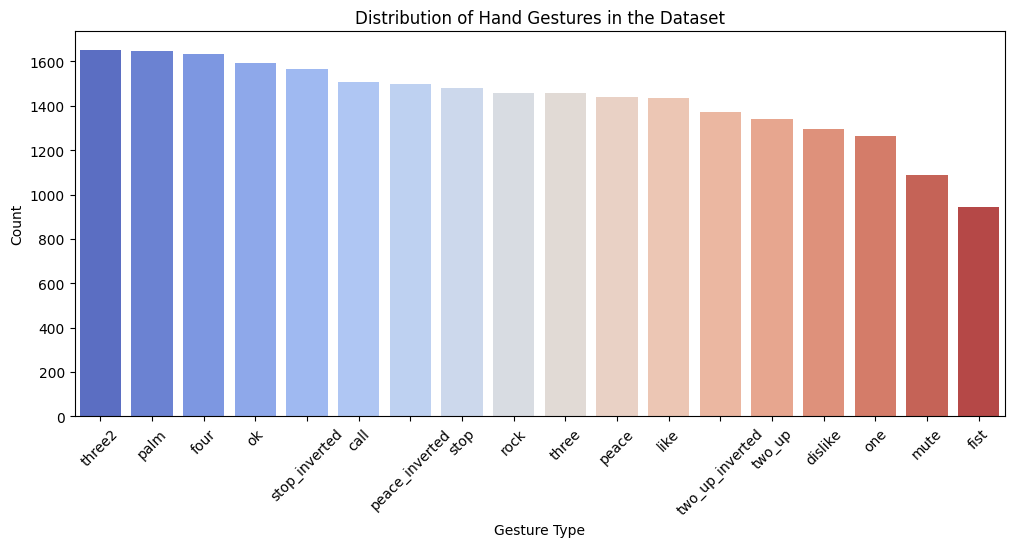

In [4]:
gesture_counts = df['label'].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(x=gesture_counts.index, y=gesture_counts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Gesture Type")
plt.ylabel("Count")
plt.title("Distribution of Hand Gestures in the Dataset")
plt.show()


In [4]:
#Centering data bu origin
wrist_x = df['x1']
wrist_y = df['y1']
wrist_z = df['z1']

for i in range(1, 22):
    df[f'x{i}'] -= wrist_x
    df[f'y{i}'] -= wrist_y
    df[f'z{i}'] -= wrist_z


In [5]:
#Normalize data
max_value = df.iloc[:, :-1].abs().max(axis=1)

for i in range(1, 22):
    df[f'x{i}'] /= max_value
    df[f'y{i}'] /= max_value
    df[f'z{i}'] /= max_value


In [6]:
#Split data 80:20
from sklearn.model_selection import train_test_split

X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 20540, Testing samples: 5135


In [7]:
#Encode Labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [8]:
#Train Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       287
           1       0.99      0.99      0.99       260
           2       0.97      0.95      0.96       209
           3       0.81      0.84      0.83       325
           4       0.98      0.97      0.98       304
           5       0.92      0.94      0.93       195
           6       0.96      0.96      0.96       340
           7       0.94      0.88      0.91       248
           8       0.84      0.82      0.83       317
           9       0.70      0.69      0.70       276
          10       0.81      0.81      0.81       307
          11       0.96      0.99      0.97       290
          12       0.85      0.91      0.88       293
          13       0.96      0.96      0.96       309
          14       0.95      0.93      0.94       298
          15       0.86      0.87      0.87       331
          16       0.73      0.73      0.73       267
          1

In [9]:
#Train SVM
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', C=1.0)
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)
print("SVM:\n", classification_report(y_test, y_pred_svm))


SVM:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78       287
           1       1.00      1.00      1.00       260
           2       0.88      0.99      0.93       209
           3       0.41      0.78      0.54       325
           4       0.78      0.85      0.82       304
           5       0.66      0.67      0.66       195
           6       0.99      0.92      0.95       340
           7       0.72      0.71      0.72       248
           8       0.66      0.48      0.55       317
           9       0.41      0.52      0.46       276
          10       0.44      0.70      0.54       307
          11       1.00      0.97      0.98       290
          12       0.83      0.27      0.41       293
          13       0.70      0.78      0.74       309
          14       0.98      0.87      0.93       298
          15       0.83      0.72      0.77       331
          16       0.43      0.25      0.32       267
          17       0.

In [10]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/3c/e3/e868f1d5951047f950d2ba1e04a765a3328a51f06996b67976d6102f8227/tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/f6/d4/349f7f4bd5ea92dab34f5bb0fe31775ef6c311427a14d5a5b31ecb442341/absl_py-2.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/b8/25/155f9f080d5e4bc0082edfda032ea2bc2b8fab3f4d25d46c1e9dd22a1a89/flatbuffers-25.2.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/a3/61/8001b38461d751c

In [11]:
#Train Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(set(y_train)), activation='softmax')
])

model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

y_pred_nn = model_nn.predict(X_test).argmax(axis=1)
print("Neural Network:\n", classification_report(y_test, y_pred_nn))


Epoch 1/50
1284/1284 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1018 - loss: 2.8087 - val_accuracy: 0.3759 - val_loss: 2.0232
Epoch 2/50
1284/1284 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.3325 - loss: 1.8516 - val_accuracy: 0.5513 - val_loss: 1.2893
Epoch 3/50
1284/1284 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4819 - loss: 1.3219 - val_accuracy: 0.5842 - val_loss: 1.0838
Epoch 4/50
1284/1284 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5374 - loss: 1.1317 - val_accuracy: 0.5994 - val_loss: 0.9811
Epoch 5/50
1284/1284 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5726 - loss: 1.0322 - val_accuracy: 0.6582 - val_loss: 0.8841
Epoch 6/50
1284/1284 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6124 - loss: 0.9507 - val_accuracy: 0.6960 - val_loss: 0.8236
Epoch 7/50
1284/1284 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6323 - loss: 0.9070 - val_accuracy: 0.6983 - val_loss: 0.7916
Epoch 8/50
1284/1284 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6622 - loss: 0.8397

In [12]:
!pip install xgboost 

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 165.2 kB/s eta 0:15:08
   ---------------------------------------- 0.0/150.0 MB 187.9 kB/s eta 0:13:19
   ---------------------------------------- 0.1/150.0 MB 416.7 kB/s eta 0:06:00
   ---------------------------------------- 0.2/150.0 MB 787.7 kB/s eta 0:03:11
   ---------------------------------------- 0.3/150.0 MB 1.1 MB/s eta 0:02:17
   ---------------------------------------- 0.4/150.0 MB 1.3 MB/s eta 0:01:57
   ---------------------------------------- 0.6/150.0 MB 1.6 MB/s eta 0:01:36
   -------------------------

In [13]:
#train XGBoost
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
model_xgb = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = model_xgb.predict(X_test)
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))


XGBoost:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       287
           1       1.00      1.00      1.00       260
           2       0.98      0.94      0.96       209
           3       0.85      0.89      0.87       325
           4       0.98      0.97      0.97       304
           5       0.92      0.94      0.93       195
           6       0.99      0.99      0.99       340
           7       0.95      0.92      0.94       248
           8       0.87      0.88      0.88       317
           9       0.82      0.80      0.81       276
          10       0.89      0.82      0.85       307
          11       0.97      0.98      0.97       290
          12       0.87      0.92      0.90       293
          13       0.98      0.96      0.97       309
          14       0.98      0.93      0.95       298
          15       0.93      0.95      0.94       331
          16       0.81      0.84      0.82       267
          17     

In [14]:
# Compare All Models
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("SVM:\n", classification_report(y_test, y_pred_svm))
print("Neural Network:\n", classification_report(y_test, y_pred_nn))
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))


Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       287
           1       0.99      0.99      0.99       260
           2       0.97      0.95      0.96       209
           3       0.81      0.84      0.83       325
           4       0.98      0.97      0.98       304
           5       0.92      0.94      0.93       195
           6       0.96      0.96      0.96       340
           7       0.94      0.88      0.91       248
           8       0.84      0.82      0.83       317
           9       0.70      0.69      0.70       276
          10       0.81      0.81      0.81       307
          11       0.96      0.99      0.97       290
          12       0.85      0.91      0.88       293
          13       0.96      0.96      0.96       309
          14       0.95      0.93      0.94       298
          15       0.86      0.87      0.87       331
          16       0.73      0.73      0.73       267
          1

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': np.arange(50, 500, 50),  
    'max_depth': [3, 5, 7, 10],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]  
}

#XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Randomized Search with 10 iterations
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model, 
    param_distributions=param_grid, 
    n_iter=10,  # num of random searches
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Optimizing for accuracy
    n_jobs=-1,  # Use all available CPU cores
    verbose=2, 
    random_state=42
)

# Run hyperparameter search
random_search_xgb.fit(X_train, y_train)

# Best hyperparameters found
print("Best Hyperparameters for XGBoost:", random_search_xgb.best_params_)

# best model
best_xgb = random_search_xgb.best_estimator_

# Evaluate on test set
y_pred_best_xgb = best_xgb.predict(X_test)
from sklearn.metrics import classification_report
print("XGBoost After Hyperparameter Tuning:\n", classification_report(y_test, y_pred_best_xgb))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for XGBoost: {'subsample': 0.8, 'n_estimators': 450, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
XGBoost After Hyperparameter Tuning:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       287
           1       1.00      1.00      1.00       260
           2       0.99      0.98      0.99       209
           3       0.92      0.94      0.93       325
           4       0.99      0.98      0.98       304
           5       0.94      0.97      0.95       195
           6       0.99      0.99      0.99       340
           7       0.98      0.94      0.96       248
           8       0.93      0.95      0.94       317
           9       0.88      0.91      0.89       276
          10       0.93      0.88      0.91       307
          11       0.99      0.99      0.99       290
          12       0.91      0.95      0.93       293
       

In [16]:
print("best_xgb:\n", classification_report(y_test, y_pred_best_xgb))

best_xgb:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       287
           1       1.00      1.00      1.00       260
           2       0.99      0.98      0.99       209
           3       0.92      0.94      0.93       325
           4       0.99      0.98      0.98       304
           5       0.94      0.97      0.95       195
           6       0.99      0.99      0.99       340
           7       0.98      0.94      0.96       248
           8       0.93      0.95      0.94       317
           9       0.88      0.91      0.89       276
          10       0.93      0.88      0.91       307
          11       0.99      0.99      0.99       290
          12       0.91      0.95      0.93       293
          13       0.98      0.97      0.98       309
          14       0.98      0.95      0.96       298
          15       0.97      0.98      0.97       331
          16       0.92      0.91      0.91       267
          17    

In [17]:
import joblib

joblib.dump(best_xgb, "optimized_xgboost.pkl")
print("XGBoost model saved successfully!")


XGBoost model saved successfully!


In [18]:
# Load the trained XGBoost model
model = joblib.load("optimized_xgboost.pkl")

print("XGBoost model loaded successfully!")

XGBoost model loaded successfully!


In [36]:
!pip install mediapipe

In [39]:
import cv2
import numpy as np
from collections import deque
from statistics import mode
import pickle

In [40]:

import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score

# Set experiment
mlflow.set_experiment("hand_gesture_recognition")

# Define parameter sets to test (optional loop for bonus)
params_list = [
    {"max_depth": 4, "learning_rate": 0.1, "n_estimators": 100},
    {"max_depth": 6, "learning_rate": 0.1, "n_estimators": 100},  #  optimized version
]

for params in params_list:
    with mlflow.start_run():
        model = XGBClassifier(
            max_depth=params["max_depth"],
            learning_rate=params["learning_rate"],
            n_estimators=params["n_estimators"]
        )

        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)

        # Log parameters
        mlflow.log_param("max_depth", params["max_depth"])
        mlflow.log_param("learning_rate", params["learning_rate"])
        mlflow.log_param("n_estimators", params["n_estimators"])

        # Log metrics
        mlflow.log_metric("accuracy", acc)

        # Log model
        mlflow.sklearn.log_model(model, "xgboost_model")

        print(f"Logged model with acc={acc:.4f}, params={params}")


2025/05/26 04:43:34 INFO mlflow.tracking.fluent: Experiment with name 'hand_gesture_recognition' does not exist. Creating a new experiment.
2025/05/26 04:44:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged model with acc=0.8939, params={'max_depth': 4, 'learning_rate': 0.1, 'n_estimators': 100}


2025/05/26 04:45:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged model with acc=0.9192, params={'max_depth': 6, 'learning_rate': 0.1, 'n_estimators': 100}
